# Working with Timeseries and Dates in Pandas<a name="_working with timeseries and dates in pandas"></a>

Excellent resources: 

* pandas docs on timeseries /date functionality: http://pandas.pydata.org/pandas-docs/stable/timeseries.html 
    
* financial data in detail: http://nbviewer.jupyter.org/github/changhiskhan/talks/blob/master/pydata2012/pandas_timeseries.ipynb
        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import datetime



## A DateTime Index column<a name="_a datetime index column"></a>

In [3]:
goog = pd.read_csv("data_week4/goog.csv", index_col="Date", parse_dates=True)
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN


Some functions that work on dates include .day -- get the day of the month:

In [3]:
goog.index.day

Int64Index([ 4,  5,  6,  7,  8, 11, 12, 13, 14, 15,
            ...
            17, 18, 19, 22, 23, 24, 26, 29, 30, 31],
           dtype='int64', name='Date', length=1257)

Get the weekday -- what day of the week is it?

In [6]:
#goog.index.weekday
#goog.index.weekday_name
goog.index.date

array([datetime.date(2010, 1, 4), datetime.date(2010, 1, 5),
       datetime.date(2010, 1, 6), ..., datetime.date(2014, 12, 29),
       datetime.date(2014, 12, 30), datetime.date(2014, 12, 31)], dtype=object)

The days of the week start with 0 for Monday.

Let's add the day of the week to the dataframe:

In [7]:
goog['Weekday'] = goog.index.weekday

In [8]:
goog.head()

,Open,High,Low,Close,Volume,Weekday
Date,,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN,0
2010-01-05,313.28,313.61,310.46,311.68,NaN,1
2010-01-06,312.62,312.62,302.88,303.83,NaN,2
2010-01-07,304.40,304.70,296.03,296.75,NaN,3
2010-01-08,295.70,301.32,294.26,300.71,NaN,4


What do you notice -- It's only weekdays in here, because those are trading days!  No need to do any cleaning, then.

## A non-index DateTime column<a name="_a non-index datetime column"></a>

Let's also duplicate the index column as a regular column, so you see how that works too:

In [9]:
goog['date copy'] = goog.index

In [10]:
goog.head()

,Open,High,Low,Close,Volume,Weekday,date copy
Date,,,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN,0,2010-01-04
2010-01-05,313.28,313.61,310.46,311.68,NaN,1,2010-01-05
2010-01-06,312.62,312.62,302.88,303.83,NaN,2,2010-01-06
2010-01-07,304.40,304.70,296.03,296.75,NaN,3,2010-01-07
2010-01-08,295.70,301.32,294.26,300.71,NaN,4,2010-01-08


In [11]:
goog.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Weekday               int64
date copy    datetime64[ns]
dtype: object

In [12]:
# Like str -- you need .dt if you're not dealing with an index datetime obj
goog['date copy'].dt.weekday_name.head()

Date
2010-01-04       Monday
2010-01-05      Tuesday
2010-01-06    Wednesday
2010-01-07     Thursday
2010-01-08       Friday
Name: date copy, dtype: object

For all the time-date components you can access, here is the doc: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components

## Practice with Groupby, using datetimes<a name="_practice with groupby, using datetimes"></a>

In [13]:
goog.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=1257)

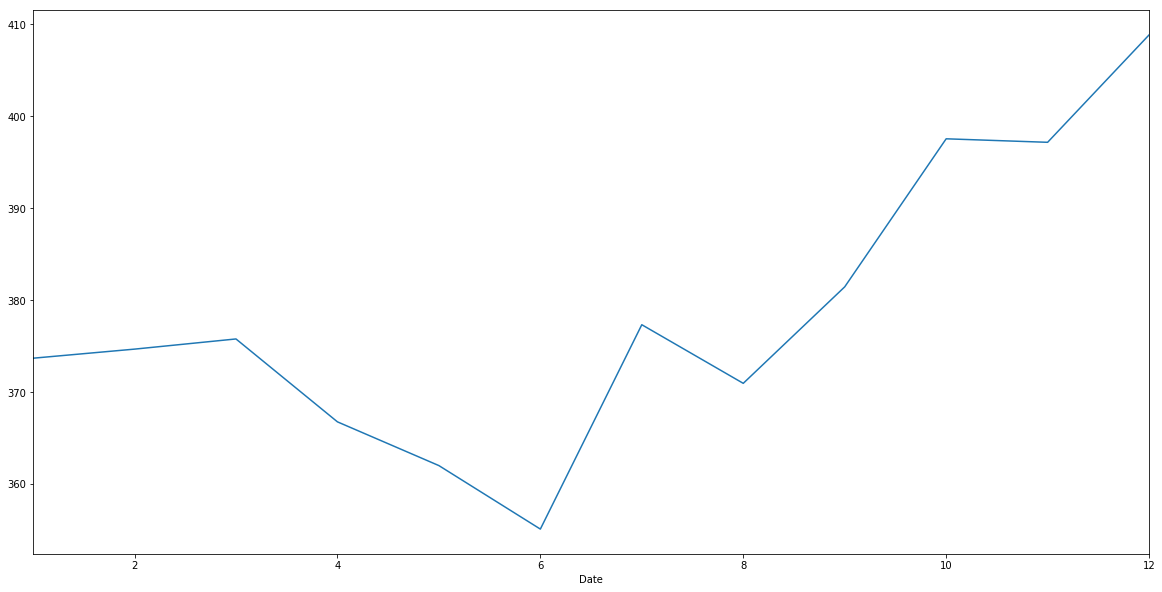

In [14]:
#We can group by months, or weekdays, and plot:
    
goog.groupby(goog.index.month).aggregate(np.mean)['High'].plot(figsize = (20,10))

## Partial String Indexing for Dates<a name="_partial string indexing for dates"></a>

You can use strings to partially match against the index.  See more docs here: 1st semester - 30 credits ECTS
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#datetimeindex-partial-string-indexing

In [15]:
goog.loc['2012-01']  # or shorthand goog['2012-01']

,Open,High,Low,Close,Volume,Weekday,date copy
Date,,,,,,,
2012-01-03,326.14,333.74,325.86,332.37,NaN,1,2012-01-03
2012-01-04,332.18,334.79,329.98,333.81,NaN,2,2012-01-04
2012-01-05,330.73,331.65,327.79,329.18,NaN,3,2012-01-05
2012-01-06,329.25,329.67,324.57,324.68,NaN,4,2012-01-06
2012-01-09,322.93,323.18,310.30,310.92,NaN,0,2012-01-09
2012-01-10,314.56,316.58,308.15,311.26,NaN,1,2012-01-10
2012-01-11,311.44,314.38,310.25,312.67,NaN,2,2012-01-11
2012-01-12,315.29,316.13,312.94,314.51,NaN,3,2012-01-12
2012-01-13,312.82,313.16,310.22,312.18,NaN,4,2012-01-13


Let's use this to slice and plot a part of the data around the max time, which we know is 2014-04-02:

In [16]:
goog['2014-03-25':'2014-04-10']

,Open,High,Low,Close,Volume,Weekday,date copy
Date,,,,,,,
2014-03-25,582.42,584.34,572.93,578.78,NaN,1,2014-03-25
2014-03-26,580.42,585.20,565.18,565.42,NaN,2,2014-03-26
2014-03-27,564.86,565.40,550.50,556.58,3826676.0,3,2014-03-27
2014-03-28,558.94,566.03,558.33,559.51,2258918.0,4,2014-03-28
2014-03-31,564.63,566.93,555.87,556.70,1942277.0,0,2014-03-31
2014-04-01,559.57,568.18,558.44,566.88,2182626.0,1,2014-04-01
2014-04-02,282.43,571.83,561.44,566.98,2088804.0,2,2014-04-02
2014-04-03,569.85,587.28,564.13,569.74,5087530.0,3,2014-04-03
2014-04-04,574.65,577.77,543.00,543.14,6377658.0,4,2014-04-04


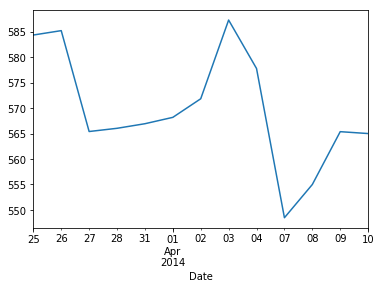

In [17]:
goog['2014-03-25':'2014-04-10']['High'].plot()

## Resampling

You can resample indexes https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

In [18]:
goog.resample('1M').mean().head()
#goog.resample('2M').mean().head()

,Open,High,Low,Close,Volume,Weekday
Date,,,,,,
2010-01-31,290.765789,292.974211,285.837895,289.011053,NaN,2.105263
2010-02-28,267.414737,269.458947,265.089474,267.178947,NaN,2.105263
2010-03-31,279.443913,282.456087,277.563913,280.235217,NaN,1.869565
2010-04-30,278.552000,280.795000,275.798500,277.958500,NaN,2.000000
2010-05-31,249.909500,252.699500,244.798500,248.417500,NaN,2.000000


## Using Rolling Windows<a name="_using rolling windows"></a>

Suppose you want to smooth out a noisy timeseries plot. You can set a window size over which to smooth, and a function like mean, to calculate over that window.  This is also quite similar to resample.  Usually you can use that.

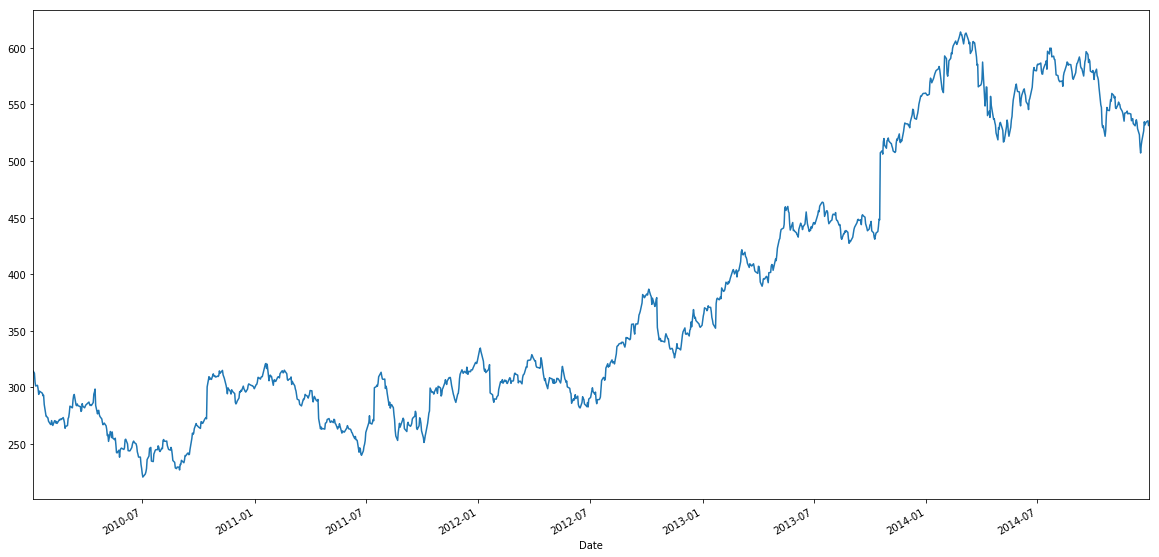

In [19]:
# You can see a lot of jagged edges in here - that's daily small variation noise.  But the rough curve is clear.
goog['High'].plot(figsize=(20,10))

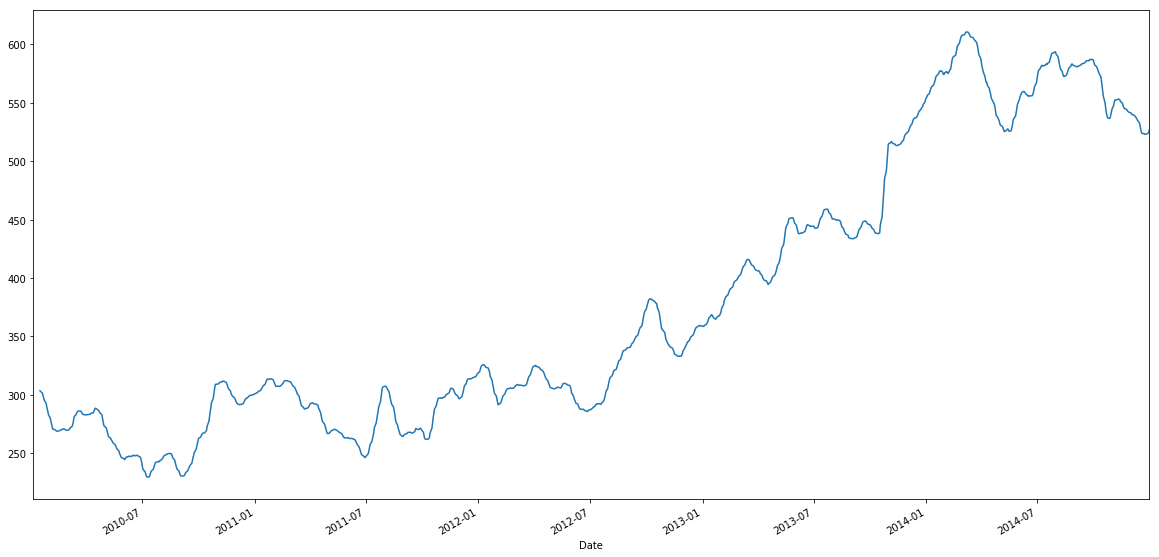

In [24]:
# this is a 30 day window.
goog['High'].rolling(window=10).mean().plot(figsize=(20,10))

## Date Conversions and Formatting<a name="_date conversions and formatting"></a>

I downloaded this data from here: http://www.nasdaq.com/symbol/aapl/interactive-chart?timeframe=5d

In [29]:
apple = pd.read_csv("data_week4/apple_jan2017.csv")

In [30]:
apple.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-23 09-30,119.93,119.93,119.93,119.93,148142.0
1,2017-01-23 09-31,120.23,120.23,120.23,120.23,1039374.0
2,2017-01-23 09-32,120.18,120.18,120.18,120.18,250078.0
3,2017-01-23 09-33,120.27,120.27,120.27,120.27,206714.0
4,2017-01-23 09-34,120.38,120.38,120.38,120.38,246886.0


In [31]:
# there's an error at the end... we don't want this row!
apple.tail()

,Date,Open,High,Low,Close,Volume
2090,2017-01-27 19-49,121.49,121.49,121.49,121.49,28.0
2091,2017-01-27 19-53,121.48,121.48,121.48,121.48,876.0
2092,2017-01-27 19-56,121.42,121.42,121.42,121.42,976.0
2093,2017-01-27 19-59,121.55,121.55,121.55,121.55,200.0
2094,This document was made with Webix library. htt...,NaN,NaN,NaN,NaN,NaN


In [32]:
apple = apple.drop(2094)

In [33]:
apple.tail()

,Date,Open,High,Low,Close,Volume
2089,2017-01-27 19-46,121.40,121.40,121.40,121.40,708.0
2090,2017-01-27 19-49,121.49,121.49,121.49,121.49,28.0
2091,2017-01-27 19-53,121.48,121.48,121.48,121.48,876.0
2092,2017-01-27 19-56,121.42,121.42,121.42,121.42,976.0
2093,2017-01-27 19-59,121.55,121.55,121.55,121.55,200.0


In [34]:
apple.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [35]:
# We have to tell the datetime function how to read the string:
apple['Date'] = pd.to_datetime(apple['Date'],format="%Y-%m-%d %H-%M")

In [36]:
apple.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [29]:
apple['Date'].head()

0   2017-01-23 09:30:00
1   2017-01-23 09:31:00
2   2017-01-23 09:32:00
3   2017-01-23 09:33:00
4   2017-01-23 09:34:00
Name: Date, dtype: datetime64[ns]

Some info on datetime formats is here: https://docs.python.org/3/library/datetime.html

In [37]:
apple = apple.set_index('Date')

In [38]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-23 09:30:00,119.93,119.93,119.93,119.93,148142.0
2017-01-23 09:31:00,120.23,120.23,120.23,120.23,1039374.0
2017-01-23 09:32:00,120.18,120.18,120.18,120.18,250078.0
2017-01-23 09:33:00,120.27,120.27,120.27,120.27,206714.0
2017-01-23 09:34:00,120.38,120.38,120.38,120.38,246886.0


We can "resample" the data by a time window, and create new time labels if we want.  This acts like a groupby, and uses a mean of the window of 60 minutes.  Why do you think there are NaNs there?

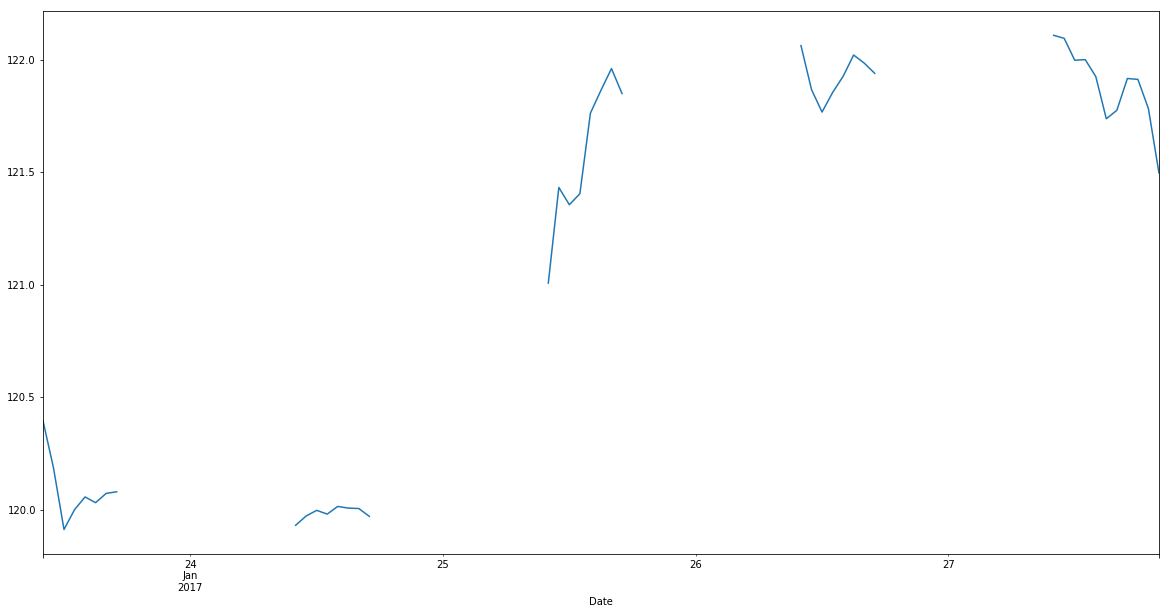

In [39]:
highs = apple['High'].resample("60Min", label="right").mean() 
highs.plot(figsize=(20,10))

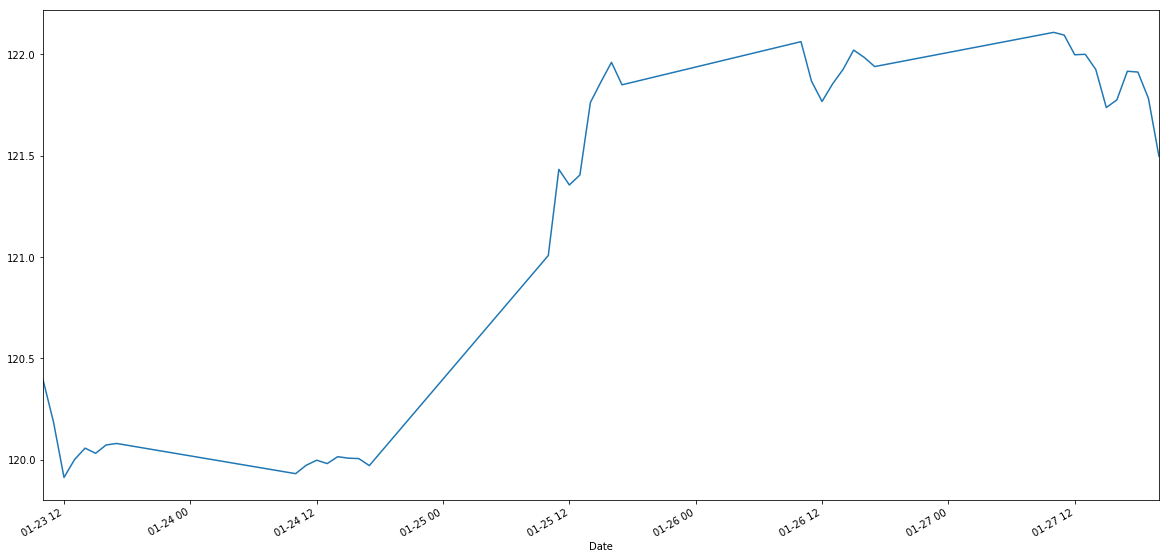

In [40]:
#drop NaNs
highs.dropna().plot(figsize = (20,10))